In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow keras matplotlib opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
# Set paths for the dataset
train_dir = '/content/drive/MyDrive/Minor_Project/train'
val_dir = '/content/drive/MyDrive/Minor_Project/val'
test_dir = '/content/drive/MyDrive/Minor_Project/test'

In [ ]:

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 4996 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
def build_inceptionv3():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers initially
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers initially
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers initially
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
# Build the models
inception_model = build_inceptionv3()
vgg_model = build_vgg16()
resnet_model = build_resnet50()

# Compile the models
inception_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_inception = ModelCheckpoint('/content/inception_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
checkpoint_vgg = ModelCheckpoint('/content/vgg_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
checkpoint_resnet = ModelCheckpoint('/content/resnet_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Train the InceptionV3 model
history_inception = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint_inception]
)

# Train the VGG16 model
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint_vgg]
)

# Train the ResNet50 model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint_resnet]
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1391s 8s/step - accuracy: 0.5805 - loss: 0.7339 - val_accuracy: 0.7167 - val_loss: 0.5571
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 147s 897ms/step - accuracy: 0.6909 - loss: 0.5799 - val_accuracy: 0.6917 - val_loss: 0.5723
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 850ms/step - accuracy: 0.7042 - loss: 0.5582 - val_accuracy: 0.7833 - val_loss: 0.5119
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 847ms/step - accuracy: 0.7140 - loss: 0.5430 - val_accuracy: 0.7833 - val_loss: 0.4811
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 836ms/step - accuracy: 0.7330 - loss: 0.5310 - val_accuracy: 0.8000 - val_loss: 0.4738
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 141s 843ms/step - accuracy: 0.7416 - loss: 0.5194 - val_accuracy: 0.7833 - val_loss: 0.4876
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 863ms/step - accuracy: 0.7435 - loss: 0.5264 - val_accuracy: 0.8000 - val_loss: 0.4676
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 839ms/step - accuracy: 0.7581 - loss: 0.4813

In [ ]:
# Load the best saved models
inception_model.load_weights('/content/inception_best_model.keras')
vgg_model.load_weights('/content/vgg_best_model.keras')
resnet_model.load_weights('/content/resnet_best_model.keras')

# Evaluate each model
inception_score = inception_model.evaluate(test_generator, verbose=1)
vgg_score = vgg_model.evaluate(test_generator, verbose=1)
resnet_score = resnet_model.evaluate(test_generator, verbose=1)

print(f'InceptionV3 Test Accuracy: {inception_score[1] * 100:.2f}%')
print(f'VGG16 Test Accuracy: {vgg_score[1] * 100:.2f}%')
print(f'ResNet50 Test Accuracy: {resnet_score[1] * 100:.2f}%')

# Get predictions from each model
inception_preds = inception_model.predict(test_generator, verbose=1)
vgg_preds = vgg_model.predict(test_generator, verbose=1)
resnet_preds = resnet_model.predict(test_generator, verbose=1)

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
inception_preds = (inception_preds > 0.5).astype(int)
vgg_preds = (vgg_preds > 0.5).astype(int)
resnet_preds = (resnet_preds > 0.5).astype(int)

# Perform majority voting
final_preds = (inception_preds + vgg_preds + resnet_preds) >= 2  # At least 2 out of 3 models should agree
final_preds = final_preds.astype(int)

# Get true labels from test generator
true_labels = test_generator.classes

# Calculate ensemble accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ensemble_accuracy = accuracy_score(true_labels, final_preds)
print(f'Ensemble Test Accuracy: {ensemble_accuracy * 100:.2f}%')

# Print detailed classification report
print(classification_report(true_labels, final_preds))
print(confusion_matrix(true_labels, final_preds))


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 15s/step - accuracy: 0.8022 - loss: 0.4616
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.7498 - loss: 0.5468
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5464 - loss: 0.6845
InceptionV3 Test Accuracy: 84.92%
VGG16 Test Accuracy: 80.16%
ResNet50 Test Accuracy: 75.40%
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
Ensemble Test Accuracy: 82.54%
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        31
           1       0.83      0.96      0.89        95

    accuracy                           0.83       126
   macro avg       0.80      0.69      0.72       126
weighted avg       0.82      0.83      0.81       126

[[13 18]
 [ 4 91]]


In [ ]:
# Calculate class weights if not already done
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# Perform majority voting with weighted strategy
def weighted_voting(predictions_list, weights):
    weighted_preds = np.zeros(predictions_list[0].shape)
    for preds, weight in zip(predictions_list, weights):
        weighted_preds += preds * weight
    return (weighted_preds >= 0.5).astype(int)

# Define model weights based on their performance
model_weights = [0.4, 0.35, 0.25]  # Example weights

# Combine predictions
ensemble_preds = weighted_voting([inception_preds, vgg_preds, resnet_preds], model_weights)


In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Base models (in practice, you should use their predictions as inputs)
# base_models = [
#     ('inception', inception_model),
#     ('vgg', vgg_model),
#     ('resnet', resnet_model)
# ]

# # Meta-model
# meta_model = LogisticRegression()

# # Stacking classifier
# stacking_model = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model
# )

# stacking_model.fit(train_generator, epochs=20, validation_data=validation_generator, class_weight=class_weights_dict)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Extract features
inception_features = inception_model.predict(train_generator, steps=len(train_generator))
vgg_features = vgg_model.predict(train_generator, steps=len(train_generator))
resnet_features = resnet_model.predict(train_generator, steps=len(train_generator))

# Combine features
combined_features = np.concatenate([inception_features, vgg_features, resnet_features], axis=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(combined_features)


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are the features and labels respectively
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# advanced_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     shear_range=0.2,
#     zoom_range=0.4,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# train_generator = advanced_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Minor_Project/train',
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'
# )


Found 4996 images belonging to 2 classes.


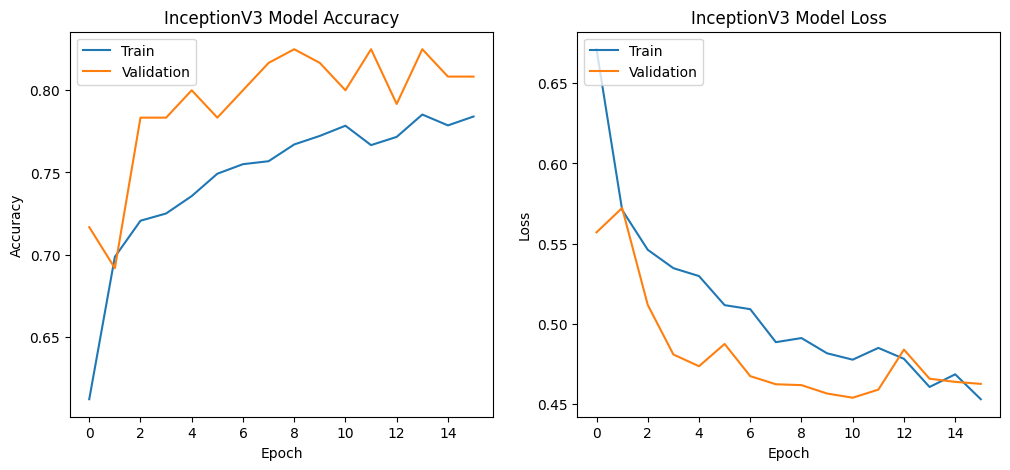

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for InceptionV3
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for InceptionV3
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


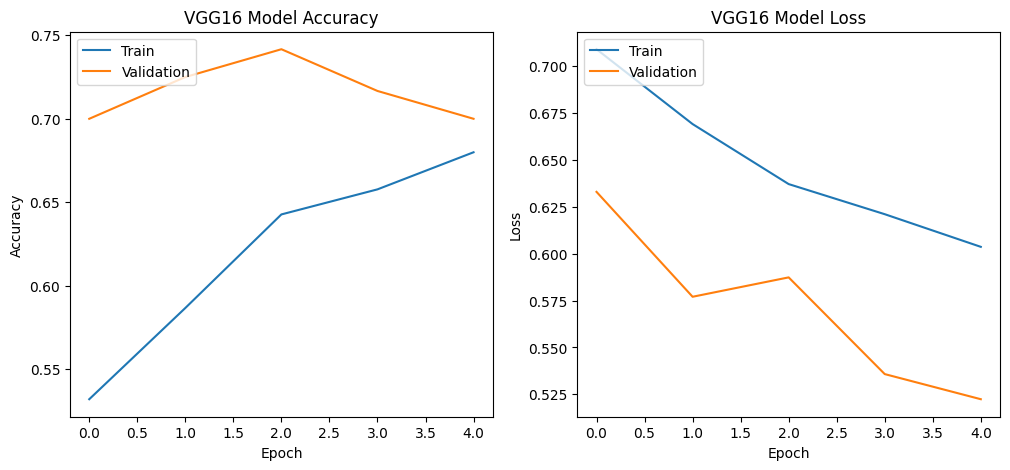

In [ ]:
# Plot training & validation accuracy values for VGG16
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for VGG16
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('VGG16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


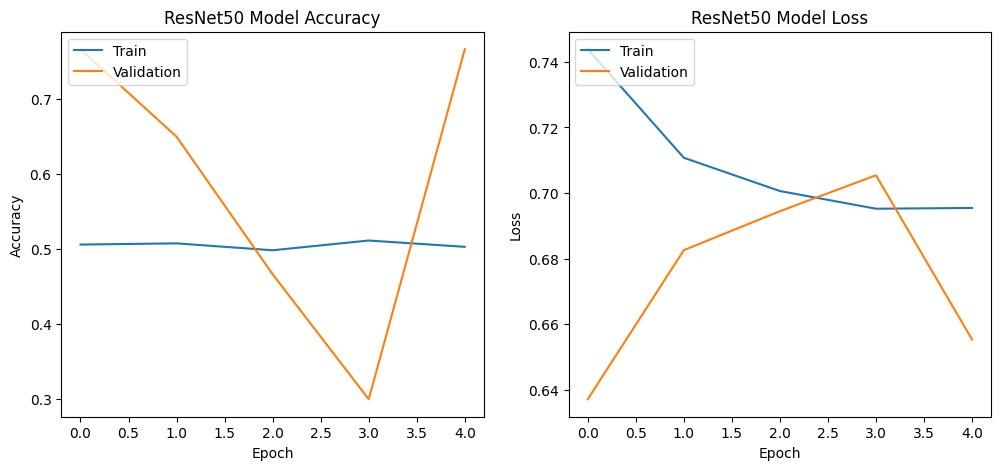

In [ ]:
# Plot training & validation accuracy values for ResNet50
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for ResNet50
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

def predict_image(model, img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 for InceptionV3
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for InceptionV3

    # Make prediction
    prediction = model.predict(img_array)
    # Convert prediction to class label
    class_labels = ['normal', 'oscc']
    predicted_class = class_labels[int(prediction[0] > 0.5)]

    return predicted_class

# Example usage
img_path = '/content/drive/MyDrive/Minor_Project/myimages/Normal_100x_13.jpg'
prediction = predict_image(inception_model, img_path)
print(f'The image is classified as: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
The image is classified as: normal


<ipython-input-31-53e4053531ce>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]


In [ ]:
def predict_images(model, img_paths):
    # List to hold the processed images
    images = []

    # Process each image
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 for InceptionV3
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)

    # Convert list of images to a single numpy array
    images_array = np.vstack(images)  # Stack images vertically into a single array
    images_array = preprocess_input(images_array)  # Preprocess for InceptionV3

    # Make predictions
    predictions = model.predict(images_array)

    # Convert predictions to class labels
    class_labels = ['normal', 'oscc']
    predicted_classes = [class_labels[int(prediction > 0.5)] for prediction in predictions]

    return predicted_classes

# Example usage
img_paths = [
    '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_12.jpg',
    '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_2.jpg',
    '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_21.jpg',
    '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_22.jpg',
    '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_25.jpg',
    '/content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_101.jpg',
    '/content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_11.jpg',
    '/content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_110.jpg',
    '/content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_112.jpg',
    '/content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_113.jpg'



]
predictions = predict_images(inception_model, img_paths)
for path, prediction in zip(img_paths, predictions):
    print(f'Image {path} is classified as: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Image /content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_12.jpg is classified as: normal
Image /content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_2.jpg is classified as: normal
Image /content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_21.jpg is classified as: normal
Image /content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_22.jpg is classified as: normal
Image /content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_25.jpg is classified as: oscc
Image /content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_101.jpg is classified as: oscc
Image /content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_11.jpg is classified as: oscc
Image /content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_110.jpg is classified as: oscc
Image /content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_112.jpg is classified as: oscc
Image /content/drive/MyDrive/Minor_Project/test/OSCC/OSCC_100x_113.jpg is classified as: oscc


<ipython-input-35-75867490ea89>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_labels[int(prediction > 0.5)] for prediction in predictions]


In [ ]:
# Define the path to save the model in Google Drive
model_save_path_drive = '/content/drive/MyDrive/models/inception_best_model.keras'


In [ ]:
import shutil

# Ensure the target directory exists
import os
os.makedirs(os.path.dirname(model_save_path_drive), exist_ok=True)

# Copy the file to Google Drive
shutil.copy('/content/inception_best_model.keras', model_save_path_drive)


'/content/drive/MyDrive/models/inception_best_model.keras'

In [ ]:
# List files in the directory to verify
print(os.listdir('/content/drive/MyDrive/models/'))


['inception_best_model.keras']


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define your model (InceptionV3 with additional layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model in HDF5 format
model_save_path = '/content/drive/MyDrive/models/inception_best_model.h5'
model.save(model_save_path, save_format='h5')


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf

# Load the model from HDF5 format
model_load_path = '/content/drive/MyDrive/models/inception_best_model.h5'
model = tf.keras.models.load_model(model_load_path)

# Predict using the model
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    class_labels = ['normal', 'oscc']
    predicted_class = class_labels[np.argmax(predictions)]
    return predicted_class

# Example usage
img_path = '/content/drive/MyDrive/Minor_Project/test/Normal/Normal_100x_12.jpg'
prediction = predict_image(model, img_path)
print(f'The image is classified as: {prediction}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is classified as: normal


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define your model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model in both formats
model.save('/content/drive/MyDrive/models/inception_best_model.keras')
model.save('/content/drive/MyDrive/models/inception_best_model.h5')
